<a href="https://colab.research.google.com/github/aanyatr/DME-detection-CNN/blob/main/DME_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
import keras
from keras import backend as K
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, DepthwiseConv2D, Flatten, Dense, BatchNormalization,Dropout,GlobalAveragePooling2D
from tensorflow.keras.activations import relu, softmax,elu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import zipfile
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from keras.utils import to_categorical # used for categorical hot coding

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
np.random.seed(60)
tf.random.set_seed(60)

In [ ]:
#@title Data Path

AN_csv11 = '/content/drive/MyDrive/MESSIDOR/Base11/Annotation_Base11.xls'
an_11= pd.read_excel(AN_csv11, usecols=['Image name', 'Risk of macular edema '])

AN_csv12 = '/content/drive/MyDrive/MESSIDOR/Base12/Annotation Base12.xls'
an_12= pd.read_excel(AN_csv12, usecols=['Image name', 'Risk of macular edema '])

AN_csv13 = '/content/drive/MyDrive/MESSIDOR/Base13/Annotation_Base13.xls'
an_13= pd.read_excel(AN_csv13, usecols=['Image name', 'Risk of macular edema '])

AN_csv14 = '/content/drive/MyDrive/MESSIDOR/Base14/Annotation Base14.xls'
an_14= pd.read_excel(AN_csv14, usecols=['Image name', 'Risk of macular edema '])

AN_csv21 = '/content/drive/MyDrive/MESSIDOR/Base21/Annotation Base21.xls'
an_21= pd.read_excel(AN_csv21, usecols=['Image name', 'Risk of macular edema '])

AN_csv22 = '/content/drive/MyDrive/MESSIDOR/Base22/Annotation Base22.xls'
an_22= pd.read_excel(AN_csv22, usecols=['Image name', 'Risk of macular edema '])

AN_csv23 = '/content/drive/MyDrive/MESSIDOR/Base23/Annotation Base23.xls'
an_23= pd.read_excel(AN_csv23, usecols=['Image name', 'Risk of macular edema '])

AN_csv24 = '/content/drive/MyDrive/MESSIDOR/Base24/Annotation Base24.xls'
an_24= pd.read_excel(AN_csv24, usecols=['Image name', 'Risk of macular edema '])

AN_csv31 = '/content/drive/MyDrive/MESSIDOR/Base31/Annotation Base31.xls'
an_31= pd.read_excel(AN_csv31, usecols=['Image name', 'Risk of macular edema '])

AN_csv32 = '/content/drive/MyDrive/MESSIDOR/Base32/Annotation Base32.xls'
an_32= pd.read_excel(AN_csv32, usecols=['Image name', 'Risk of macular edema '])

AN_csv33 = '/content/drive/MyDrive/MESSIDOR/Base33/Annotation Base33.xls'
an_33= pd.read_excel(AN_csv33, usecols=['Image name', 'Risk of macular edema '])

AN_csv34 = '/content/drive/MyDrive/MESSIDOR/Base34/Annotation Base34.xlsx'
an_34= pd.read_excel(AN_csv34, usecols=['Image name', 'Risk of macular edema '])


data_path11 ="/content/drive/MyDrive/MESSIDOR/Base11"
data_path12= "/content/drive/MyDrive/MESSIDOR/Base12"
data_path13= "/content/drive/MyDrive/MESSIDOR/Base13"
data_path14= "/content/drive/MyDrive/MESSIDOR/Base14"
data_path21= "/content/drive/MyDrive/MESSIDOR/Base21"
data_path22= "/content/drive/MyDrive/MESSIDOR/Base22"
data_path23= "/content/drive/MyDrive/MESSIDOR/Base23"
data_path24= "/content/drive/MyDrive/MESSIDOR/Base24"
data_path31= "/content/drive/MyDrive/MESSIDOR/Base31"
data_path32= "/content/drive/MyDrive/MESSIDOR/Base32"
data_path33= "/content/drive/MyDrive/MESSIDOR/Base33"
data_path34= "/content/drive/MyDrive/MESSIDOR/Base34"

train_csv_path ='/content/drive/MyDrive/R&D dataset/data set/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv'
test_csv_path ='/content/drive/MyDrive/R&D dataset/data set/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'

# Read train and test CSV files with specific columns
train_df = pd.read_csv(train_csv_path, usecols=['Image name', 'Risk of macular edema '])
test_df = pd.read_csv(test_csv_path, usecols=['Image name', 'Risk of macular edema '])

# Convert 'Risk of macular edema' column to string type
train_df['Risk of macular edema '] = train_df['Risk of macular edema '].astype(str)
test_df['Risk of macular edema '] = test_df['Risk of macular edema '].astype(str)

train_df['Image name'] = train_df['Image name'].astype(str)+ '.jpg'
test_df['Image name'] = test_df['Image name'].astype(str)+ '.jpg'

#Load image from the dataset
train_data_dir= '/content/drive/MyDrive/R&D dataset/data set/B. Disease Grading/1. Original Images/a. Training Set'
test_data_dir = '/content/drive/MyDrive/R&D dataset/data set/B. Disease Grading/1. Original Images/b. Testing Set'


In [ ]:
#@title Image Read Function

#define function to read images and labels messidor dataset

def read_images_and_labels(data_path, annotation_df):
  data=[]

  for index, row in annotation_df.iterrows():
    image_name = row['Image name']
    label = row['Risk of macular edema ']

    image_path = os.path.join(data_path, image_name)
    image = cv2.imread(image_path) #assuming in open cv compatible format
    image = cv2.resize(image, (224,224))

    data.append([image, label])
  return data

In [ ]:
#@title calling read image functions

#read images and labels for each dataset

data1 = read_images_and_labels(data_path11, an_11)
data2 = read_images_and_labels(data_path12, an_12)
data3 = read_images_and_labels(data_path13, an_13)
data4 = read_images_and_labels(data_path14, an_14)
data5 = read_images_and_labels(data_path21, an_21)
data6 = read_images_and_labels(data_path22, an_22)
data7 = read_images_and_labels(data_path23, an_23)
data8 = read_images_and_labels(data_path24, an_24)
data9 = read_images_and_labels(data_path31, an_31)
data10 = read_images_and_labels(data_path32, an_32)
data11 = read_images_and_labels(data_path33, an_33)
data12 = read_images_and_labels(data_path34, an_34)

data= data1+ data2+ data3+ data4 + data5 + data6 + data7 +data8 + data9 + data10 + data11 + data12

print("data reading done")


data reading done


In [ ]:
np.random.shuffle(data)

In [ ]:
X= []
y=[]

for features, label in data:
  X.append(features)
  y.append(label)

X = np.array(X)
y = np.array(y)
# out = np.divide(X,255)

# y= to_categorical(y, num_classes =3)

# Stratified splitting for train-test split
n_splits = 1
test_size = 0.2
stratified_split = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=43)

In [ ]:
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Further split training data into training and validation sets
for train_index, val_index in stratified_split.split(X_train, y_train):
    X_train, X_val = X_train[train_index], X_train[val_index]
    y_train, y_val = y_train[train_index], y_train[val_index]

In [ ]:
# Check classwise distribution in train, test, and validation sets
unique_classes = np.unique(np.concatenate((y_train, y_test, y_val)))
for class_label in unique_classes:
    print(f"Class {class_label}:")
    print(f"Train: {np.sum(y_train == class_label)} images")
    print(f"Test: {np.sum(y_test == class_label)} images")
    print(f"Validation: {np.sum(y_val == class_label)} images")
    print('.........')

Class 0:
Train: 623 images
Test: 195 images
Validation: 156 images
.........
Class 1:
Train: 48 images
Test: 15 images
Validation: 12 images
.........
Class 2:
Train: 97 images
Test: 30 images
Validation: 24 images
.........


In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train, num_classes=3)
val_labels = to_categorical(y_val, num_classes=3)
test_labels_one_hot = to_categorical(y_test, num_classes=3)

In [ ]:
# CREATING THE CNN MODEL:

model = Sequential([
    #LAYER1
    Conv2D(24, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    #LAYER2
    Conv2D(40, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    #LAYER3
    Conv2D(56, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    #LAYER4
    Conv2D(80, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    #LAYER5
    Conv2D(96, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    #DEPTH WISE CONV LAYER
    DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    #DEPTH WISE CONV LAYER
    DepthwiseConv2D(kernel_size=(3, 3), padding='same', activation='relu'),
    #GAP USED
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 24)      672       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 24)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 40)      8680      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 40)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 56)        20216     
                                                                 
 batch_normalization (Batch  (None, 56, 56, 56)        2

In [ ]:
# Compile the model
custom_optimizer = Adam(learning_rate= )
model.compile(optimizer=custom_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=9, restore_best_weights=True)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=3,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001         # Lower bound on the learning rate
)

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

history = model.fit(X_train, train_labels, epochs=30, batch_size=16, validation_data=(X_val, val_labels),callbacks=[early_stopping, reduce_lr])

Epoch 1/30
48/48 [==============================] - 6s 29ms/step - loss: 0.5141 - accuracy: 0.8294 - val_loss: 0.5488 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/30
48/48 [==============================] - 1s 21ms/step - loss: 0.5118 - accuracy: 0.8177 - val_loss: 0.5490 - val_accuracy: 0.8073 - lr: 0.0010
Epoch 3/30
48/48 [==============================] - 1s 21ms/step - loss: 0.4815 - accuracy: 0.8190 - val_loss: 0.5471 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/30
48/48 [==============================] - 1s 22ms/step - loss: 0.4978 - accuracy: 0.8203 - val_loss: 0.5458 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/30
48/48 [==============================] - 1s 20ms/step - loss: 0.4841 - accuracy: 0.8216 - val_loss: 0.5606 - val_accuracy: 0.8021 - lr: 0.0010
Epoch 6/30
48/48 [==============================] - 1s 23ms/step - loss: 0.4753 - accuracy: 0.8268 - val_loss: 0.5529 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 7/30
48/48 [==============================] - 1s 23ms/step - loss: 0.4

In [ ]:
# Evaluate the model on testing set
test_loss, test_acc = model.evaluate(X_test, test_labels_one_hot)
print('Testing accuracy:', test_acc)


8/8 [==============================] - 0s 13ms/step - loss: 0.5362 - accuracy: 0.8292
Testing accuracy: 0.8291666507720947


In [ ]:
# Calculate precision and recall for validation data after each epoch
history.history['val_precision'] = []
history.history['val_recall'] = []

for epoch in range(30):
    val_predictions = model.predict(X_val)
    val_predictions = np.argmax(val_predictions, axis=1)
    val_precision = precision_score(np.argmax(val_labels, axis=1), val_predictions, average='macro')
    val_recall = recall_score(np.argmax(val_labels, axis=1), val_predictions, average='macro')
    history.history['val_precision'].append(val_precision)
    history.history['val_recall'].append(val_recall)

5/6 [========================>.....] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/6 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/6 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/6 [========================>.....] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/6 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/6 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/6 [========================>.....] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/6 [========================>.....] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/6 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/6 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/6 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/6 [===================>..........] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate precision and recall on training set
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=1)
train_precision = precision_score(np.argmax(train_labels, axis=1), train_predictions, average='macro')
train_recall = recall_score(np.argmax(train_labels, axis=1), train_predictions, average='macro')
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)

24/24 [==============================] - 0s 10ms/step
Training Precision: 0.5751986804618383
Training Recall: 0.41420242370085997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate precision and recall on testing set
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)
test_precision = precision_score(np.argmax(test_labels_one_hot, axis=1), test_predictions, average='macro')
test_recall = recall_score(np.argmax(test_labels_one_hot, axis=1), test_predictions, average='macro')
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)

8/8 [==============================] - 0s 8ms/step
Testing Precision: 0.5272988505747126
Testing Recall: 0.39658119658119656


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


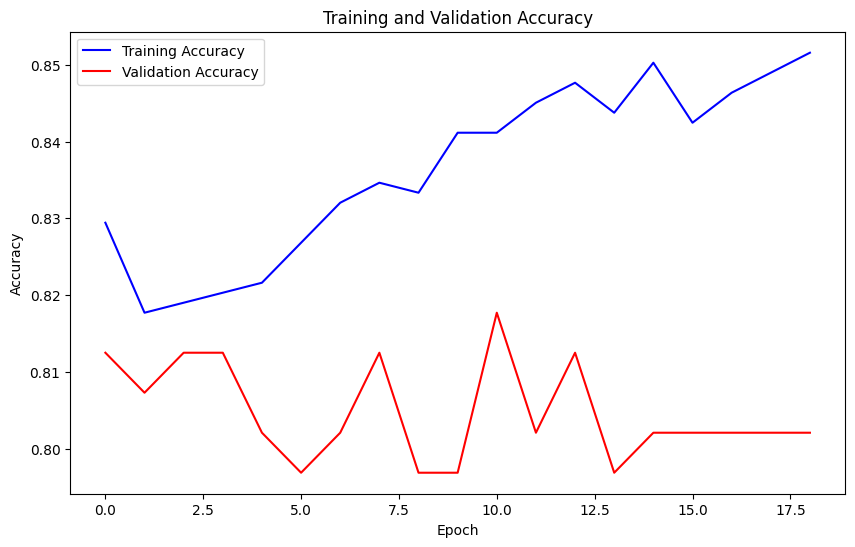

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = ['DME 0', 'DME 1', 'DME 2']
report = classification_report(np.argmax(test_labels_one_hot, axis=1), y_pred_classes, target_names=class_names)
print(report)

8/8 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       DME 0       0.83      0.99      0.90       195
       DME 1       0.00      0.00      0.00        15
       DME 2       0.75      0.20      0.32        30

    accuracy                           0.83       240
   macro avg       0.53      0.40      0.41       240
weighted avg       0.77      0.83      0.77       240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


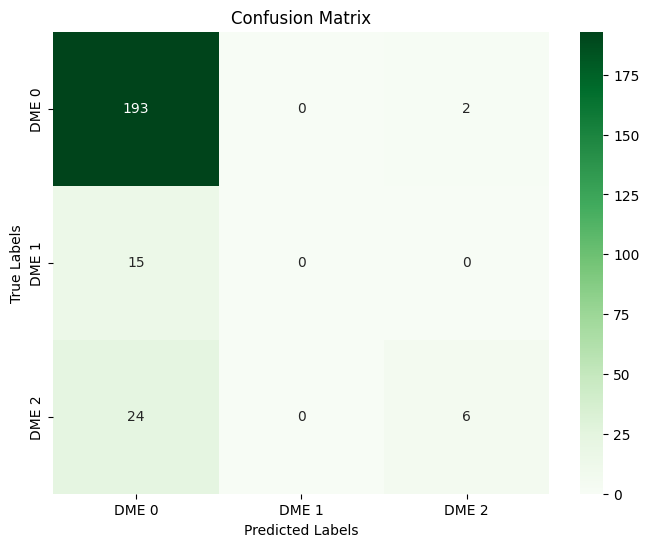

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels_one_hot, axis=1), y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Manually calculate precision and recall after each epoch
history.history['precision'] = []
history.history['recall'] = []

for epoch in range(30):
    train_predictions = model.predict(X_train)
    train_predictions = np.argmax(train_predictions, axis=1)
    train_precision = precision_score(np.argmax(train_labels, axis=1), train_predictions, average='macro')
    train_recall = recall_score(np.argmax(train_labels, axis=1), train_predictions, average='macro')
    history.history['precision'].append(train_precision)
    history.history['recall'].append(train_recall)


24/24 [==============================] - 1s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 1s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 1/24 [>.............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 1s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 1/24 [>.............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 1/24 [>.............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 1/24 [>.............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


24/24 [==============================] - 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


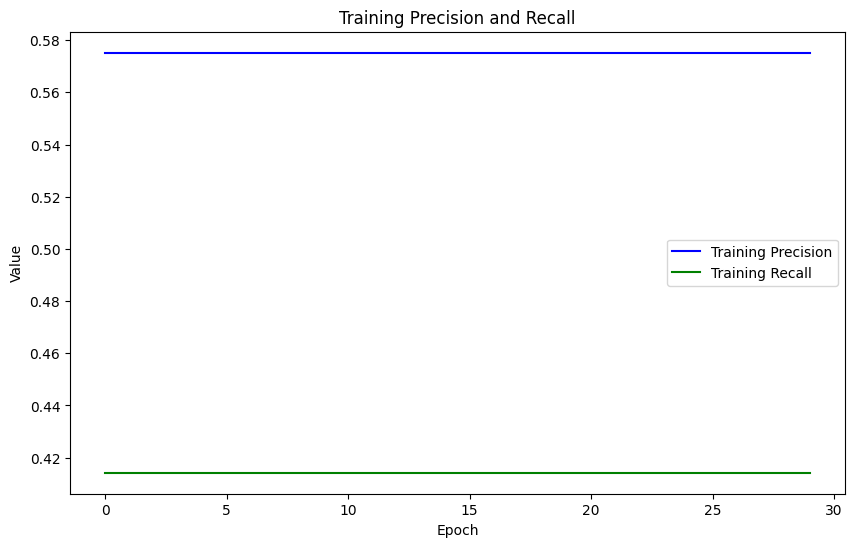

In [ ]:
 # Plot training precision and recall
plt.figure(figsize=(10, 6))
plt.plot(history.history['precision'], label='Training Precision', color='blue')
plt.plot(history.history['recall'], label='Training Recall', color='green')
plt.title('Training Precision and Recall')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()